# LOGISTIC_REGRESSION

## Importing all the necessary modules

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt          
import datetime as dt 
import scipy.stats as stats
import statsmodels.formula.api as smf

In [182]:
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split

#Module related to calculation of metrics
from sklearn import metrics

## Importing the data from an external source into the Python environment

In [183]:
data = pd.read_csv('train.csv')
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [184]:
data.shape

(45211, 11)

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


## Data Duplicacy: Chech if their is duplicate data or not

In [186]:
data.duplicated().sum()

6

In [187]:
data.drop_duplicates(inplace=True)

In [188]:
data.duplicated().sum()

0

In [189]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [190]:
data.shape

(45205, 11)

## Checking the value count and nunique of categorical variables

In [191]:
data.select_dtypes(['object']).nunique()

job               12
marital            3
education_qual     4
call_type          3
mon               12
prev_outcome       4
y                  2
dtype: int64

In [192]:
data['job'].value_counts()

job
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [193]:
data['marital'].value_counts()

marital
married     27210
single      12788
divorced     5207
Name: count, dtype: int64

In [194]:
data['education_qual'].value_counts()

education_qual
secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: count, dtype: int64

In [195]:
data['call_type'].value_counts()

call_type
cellular     29282
unknown      13017
telephone     2906
Name: count, dtype: int64

In [196]:
data['mon'].value_counts()

mon
may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [197]:
data['prev_outcome'].value_counts()

prev_outcome
unknown    36953
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [198]:
data['y'].value_counts()

y
no     39916
yes     5289
Name: count, dtype: int64

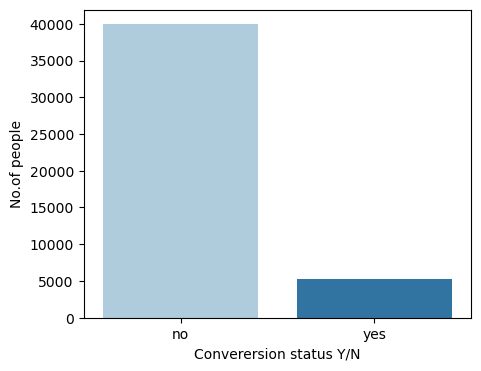

In [199]:
plt.figure(figsize=(5, 4))
sns.countplot(x=data['y'],palette='Paired')
plt.xlabel('Converersion status Y/N')
plt.ylabel('No.of people')
plt.show()

In [200]:
print("percentage of no in the target variable : ",((39922)/(39922+5289))*100) # percentage of no in the target variable
print("percentage of yes in the target variable : ",((5289)/(39922+5289))*100)  # percentage of yes in the target variable
     

percentage of no in the target variable :  88.30151954170445
percentage of yes in the target variable :  11.698480458295547


**Based on our analysis, we have determined that the given data is imbalanced.**
**The target column exhibits class imbalance, majority class representing "no" - (88.30%) minority class representing "yes" - (11.69%)**

## Missing value detection and treatment

In [201]:
data.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

<Axes: xlabel='job'>

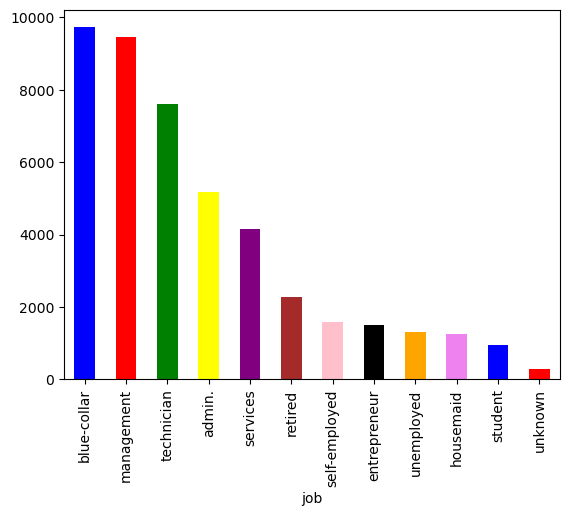

In [202]:
data['job'].value_counts().plot(kind='bar',color=['blue','red','green','yellow','purple','brown','pink','black','orange','violet'])

<Axes: xlabel='marital'>

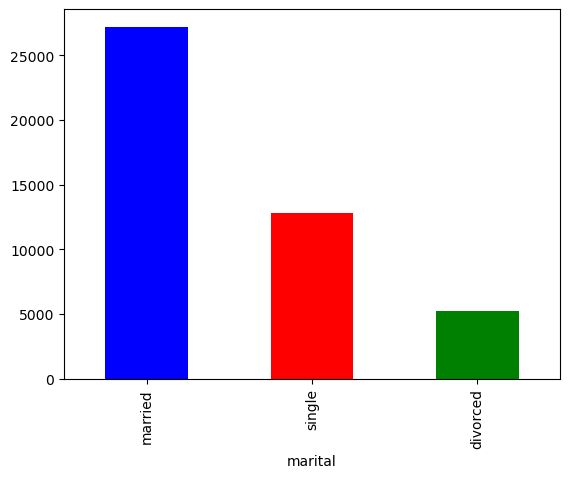

In [203]:
data['marital'].value_counts().plot(kind='bar',color=['blue','red','green'])

<Axes: xlabel='education_qual'>

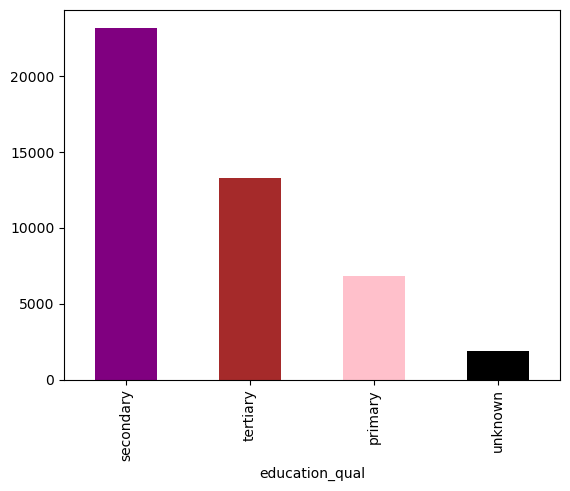

In [204]:
data['education_qual'].value_counts().plot(kind='bar',color=['purple','brown','pink','black'])

<Axes: xlabel='call_type'>

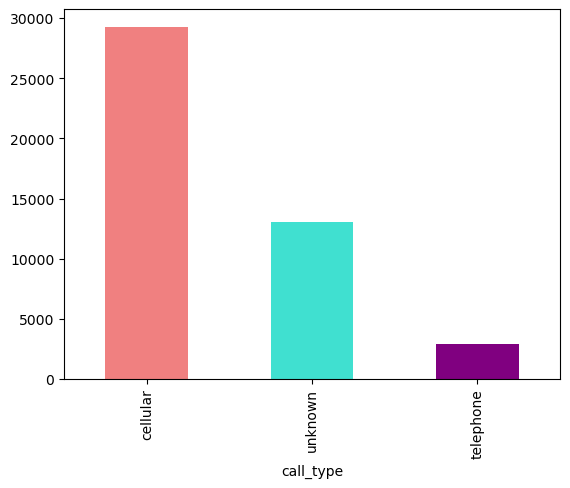

In [205]:
data['call_type'].value_counts().plot(kind = 'bar',color = ['#F08080','#40E0D0','purple'])

<Axes: xlabel='prev_outcome'>

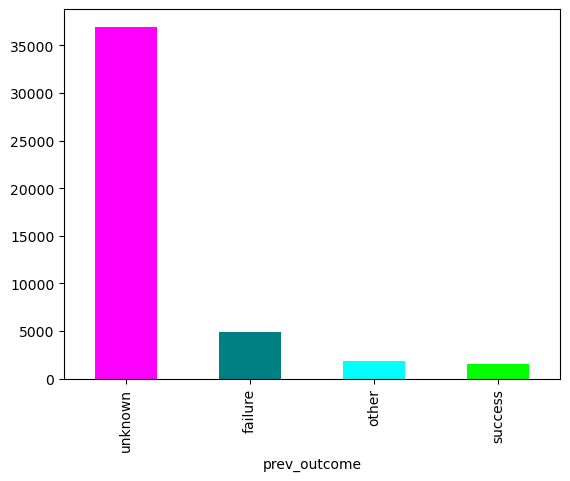

In [206]:
data['prev_outcome'].value_counts().plot(kind = 'bar',color = ['#FF00FF','#008080','#00FFFF','#00FF00'])

In [207]:
def Numerical_features(col):
  plt.figure(figsize=(20,17))
  x=1
  for i in col:
    plt.subplot(2,2,x)
    sns.histplot(x=i, hue='y', data=data, kde=True, edgecolor='black')
    plt.title(f'Histogram of {i}', fontweight='black', pad=10, fontsize=20 )
    plt.xticks(rotation=90)
    x += 1

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

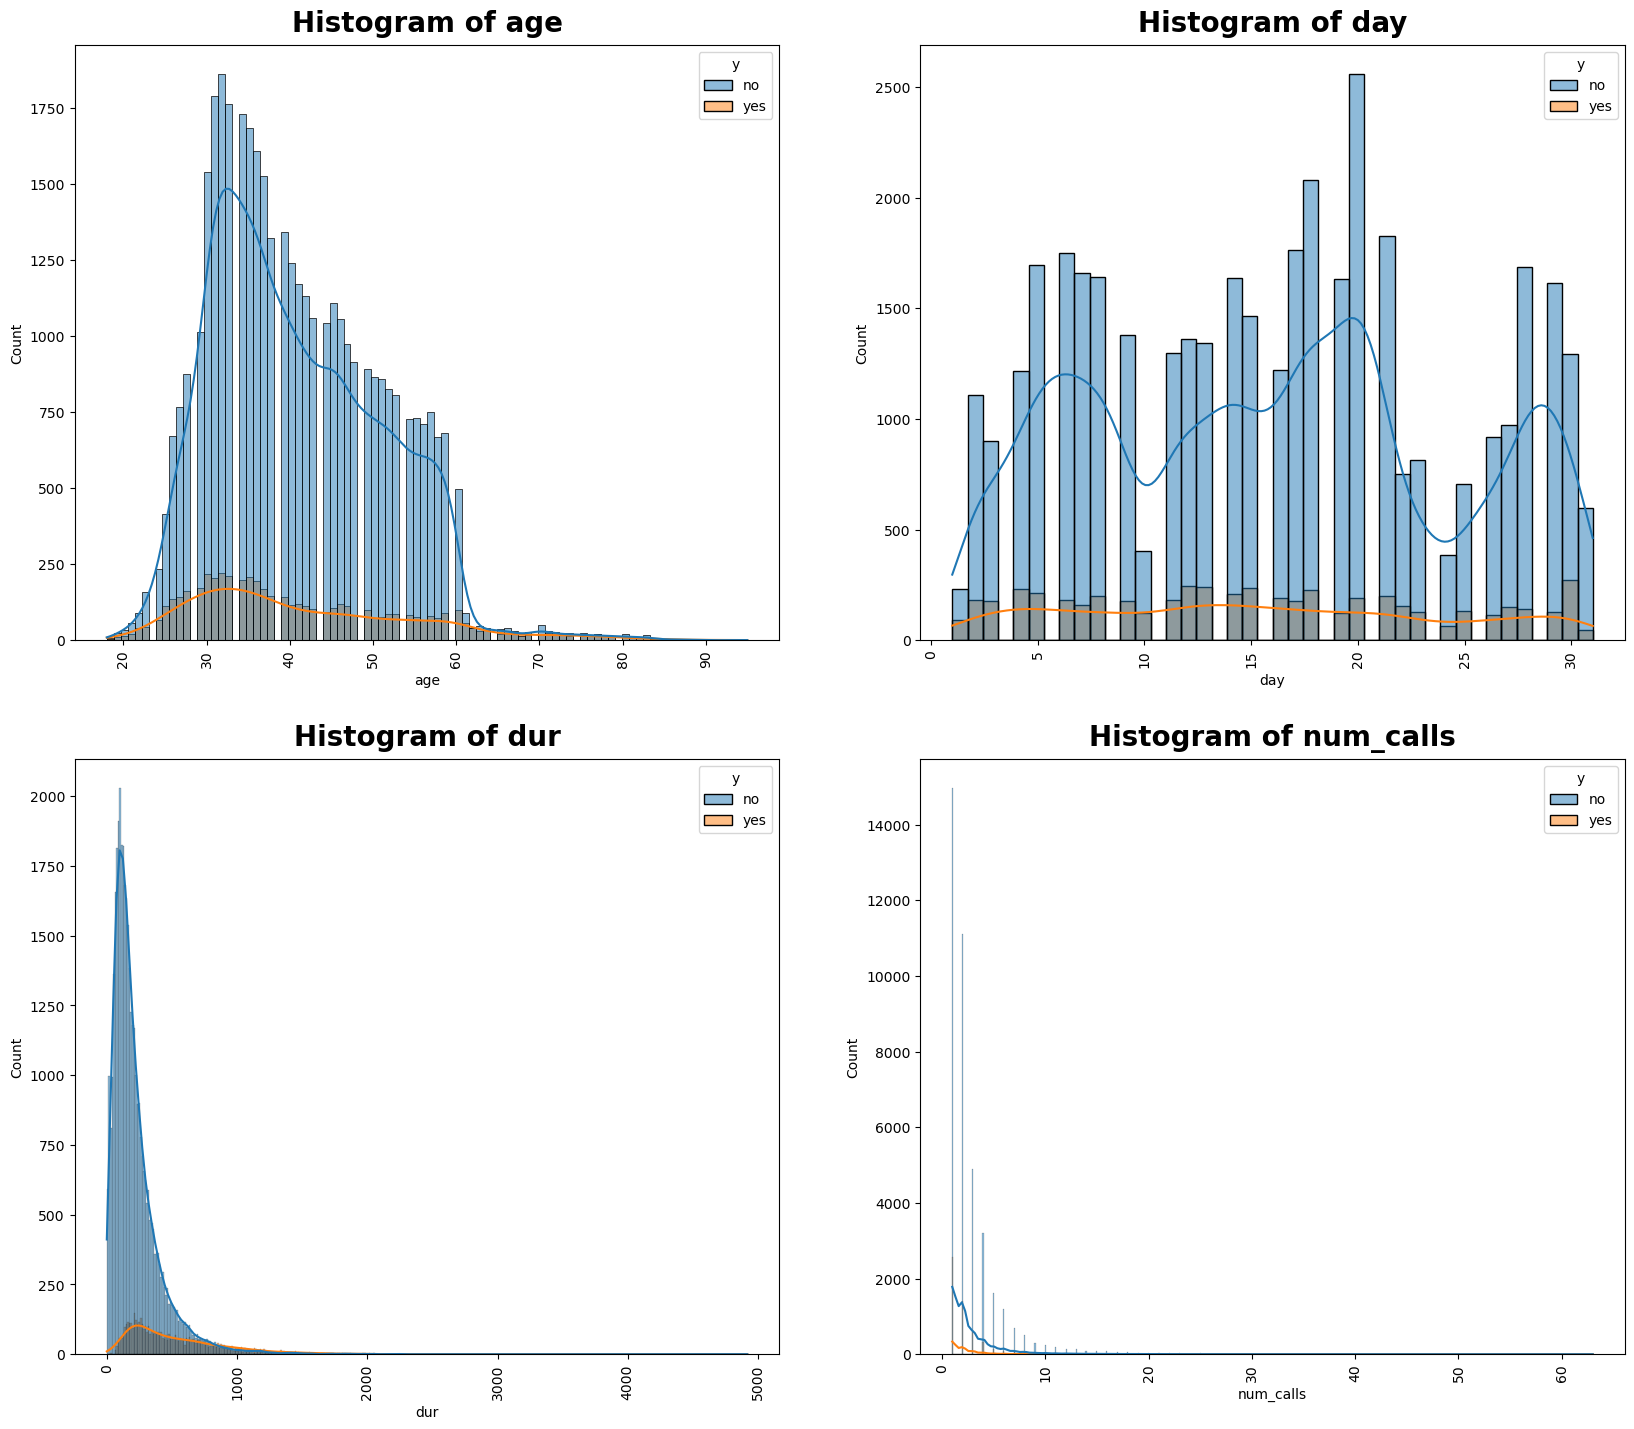

In [208]:
Numerical_features(['age', 'day', 'dur', 'num_calls'])

In [209]:
data.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [210]:
data['row_num'] = pd.Series(range(1,45212,1))

In [211]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,row_num
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,1
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,2
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,3
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,4
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,5


## Splitting the data into categorical columns and numerical columns:

In [212]:
cat = [var for var in data.columns if data[var].dtype == 'O']
num = [var for var in data.columns if data[var].dtype != 'O']

In [213]:
num_data = data[num]
cat_data = data[cat]

In [214]:
num_data.head()

,age,day,dur,num_calls,row_num
0,58,5,261,1,1
1,44,5,151,1,2
2,33,5,76,1,3
3,47,5,92,1,4
4,33,5,198,1,5


In [215]:
cat_data.head()

,job,marital,education_qual,call_type,mon,prev_outcome,y
0,management,married,tertiary,unknown,may,unknown,no
1,technician,single,secondary,unknown,may,unknown,no
2,entrepreneur,married,secondary,unknown,may,unknown,no
3,blue-collar,married,unknown,unknown,may,unknown,no
4,unknown,single,unknown,unknown,may,unknown,no


In [216]:
num_data.shape

(45205, 5)

In [217]:
cat_data.shape

(45205, 7)

In [218]:
cat_data['row'] = data['row_num']

C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_13664\615142602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['row'] = data['row_num']


In [219]:
cat_data.head(4)

,job,marital,education_qual,call_type,mon,prev_outcome,y,row
0,management,married,tertiary,unknown,may,unknown,no,1
1,technician,single,secondary,unknown,may,unknown,no,2
2,entrepreneur,married,secondary,unknown,may,unknown,no,3
3,blue-collar,married,unknown,unknown,may,unknown,no,4


## Outlier Detection and Treatment on the numerical data

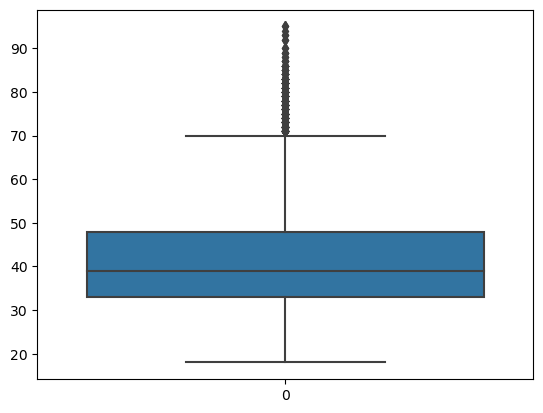

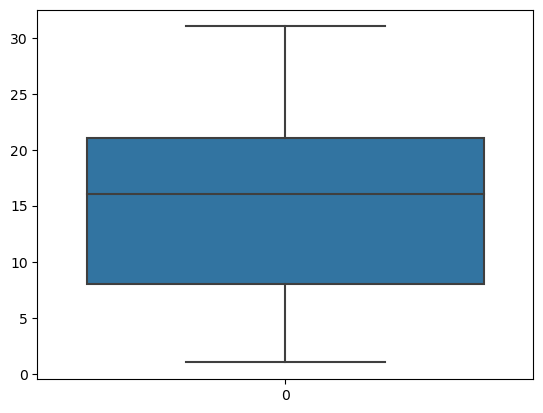

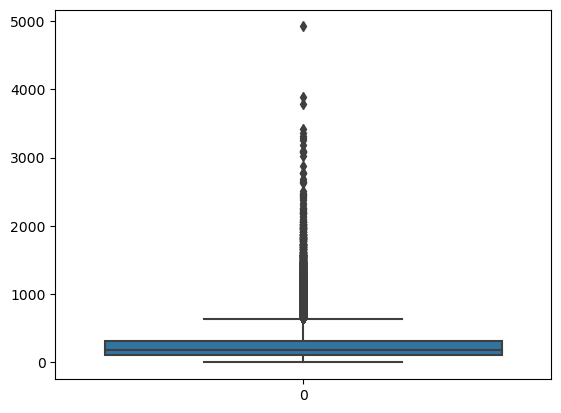

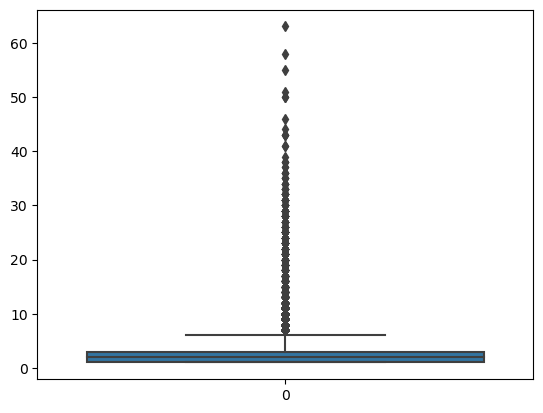

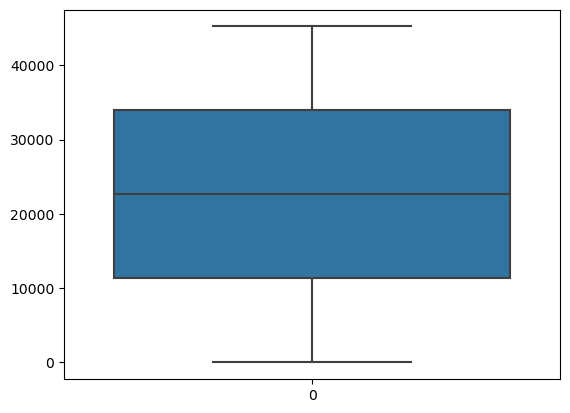

In [220]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

In [221]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [222]:
num_data.apply(outliertreat_IQR)

,age,day,dur,num_calls,row_num
0,10.5,-11.5,-221.0,-2.0,-22605.0
1,70.5,40.5,643.0,6.0,67819.0


In [223]:
num_data['age'] = num_data['age'].clip(lower = 10.5, upper = 70.5)
num_data['dur'] = num_data['dur'].clip(lower = -221.0, upper = 643.0)
num_data['num_calls'] = num_data['num_calls'].clip(lower = -2.0, upper = 6.0)

C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_13664\909479493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['age'] = num_data['age'].clip(lower = 10.5, upper = 70.5)
C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_13664\909479493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['dur'] = num_data['dur'].clip(lower = -221.0, upper = 643.0)
C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_13664\909479493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

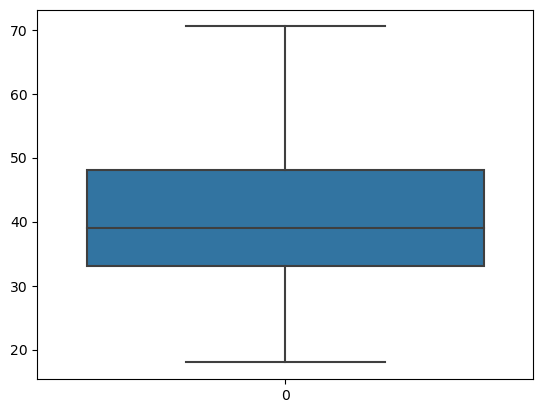

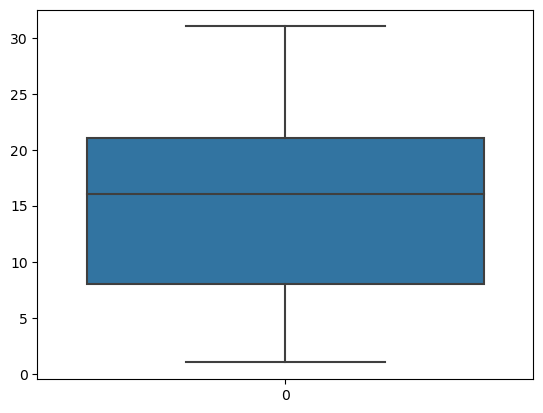

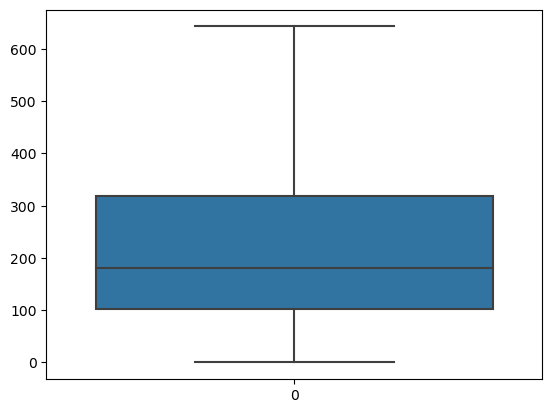

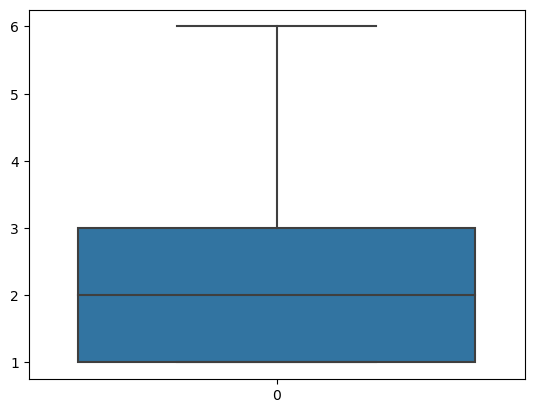

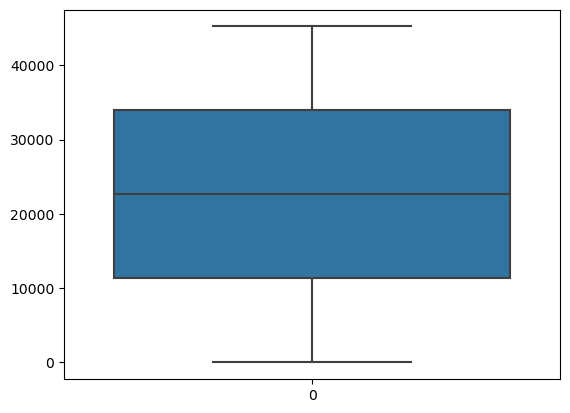

In [224]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

## Merging the numerical data and the categorical data:

In [225]:
cat_data.shape

(45205, 8)

In [226]:
num_data.shape

(45205, 5)

In [227]:
final_data = pd.merge(num_data,cat_data,how = 'inner', left_on = 'row_num', right_on = 'row')

In [228]:
final_data.head()

,age,day,dur,num_calls,row_num,job,marital,education_qual,call_type,mon,prev_outcome,y,row
0,58.0,5,261,1,1,management,married,tertiary,unknown,may,unknown,no,1
1,44.0,5,151,1,2,technician,single,secondary,unknown,may,unknown,no,2
2,33.0,5,76,1,3,entrepreneur,married,secondary,unknown,may,unknown,no,3
3,47.0,5,92,1,4,blue-collar,married,unknown,unknown,may,unknown,no,4
4,33.0,5,198,1,5,unknown,single,unknown,unknown,may,unknown,no,5


In [229]:
final_data.shape

(45205, 13)

**copy of dataset**

In [230]:
final_data1 = final_data.copy()

In [231]:
final_data1.head()

,age,day,dur,num_calls,row_num,job,marital,education_qual,call_type,mon,prev_outcome,y,row
0,58.0,5,261,1,1,management,married,tertiary,unknown,may,unknown,no,1
1,44.0,5,151,1,2,technician,single,secondary,unknown,may,unknown,no,2
2,33.0,5,76,1,3,entrepreneur,married,secondary,unknown,may,unknown,no,3
3,47.0,5,92,1,4,blue-collar,married,unknown,unknown,may,unknown,no,4
4,33.0,5,198,1,5,unknown,single,unknown,unknown,may,unknown,no,5


## ONE-HOT ENCODING:

In [232]:
cat_data.nunique()

job                  12
marital               3
education_qual        4
call_type             3
mon                  12
prev_outcome          4
y                     2
row               45205
dtype: int64

In [233]:
cat_data.columns

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y', 'row'],
      dtype='object')

In [234]:
final_data1 = pd.get_dummies(final_data1,columns = ['job','marital', 'education_qual', 'call_type','mon', 'prev_outcome'],dtype = int)

In [235]:
final_data1['y'] = final_data1['y'].map({'yes' : 1,'no' : 0})

In [236]:
final_data1.head()

,age,day,dur,num_calls,row_num,y,row,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_qual_primary,education_qual_secondary,education_qual_tertiary,education_qual_unknown,call_type_cellular,call_type_telephone,call_type_unknown,mon_apr,mon_aug,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,5,261,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44.0,5,151,1,2,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33.0,5,76,1,3,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47.0,5,92,1,4,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33.0,5,198,1,5,0,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [237]:
final_data.shape

(45205, 13)

## Checking if the data is normally distributed or not

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*arg

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tig

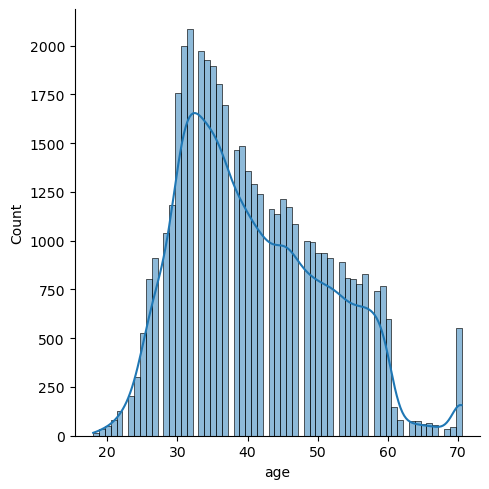

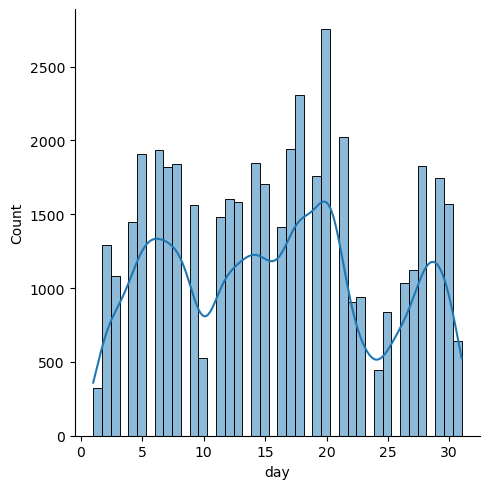

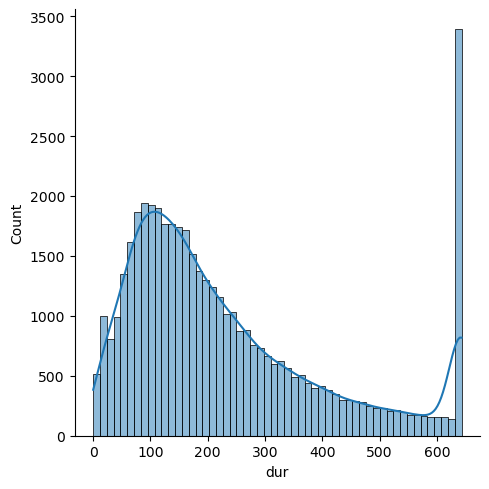

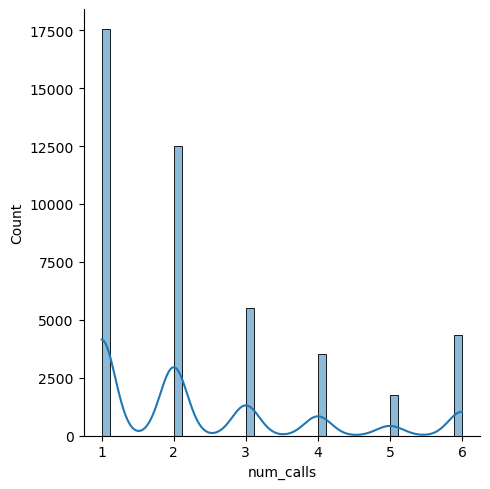

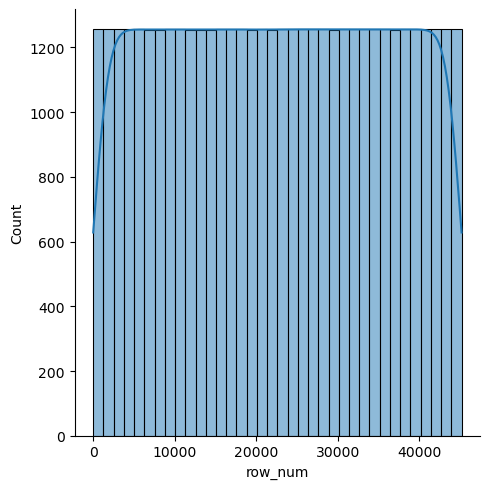

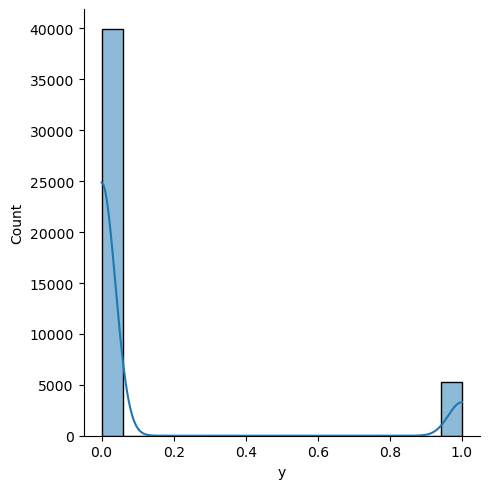

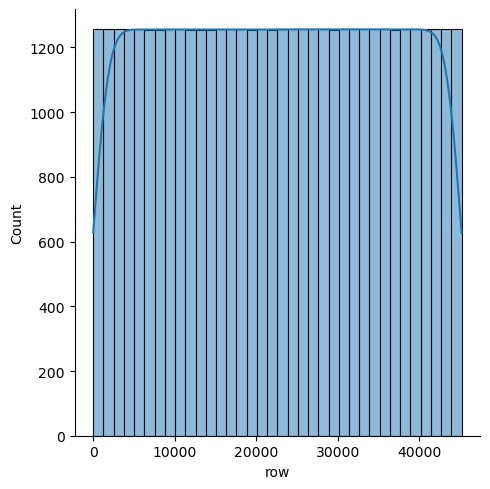

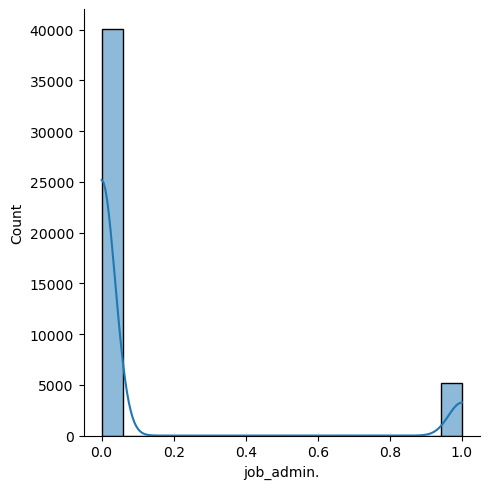

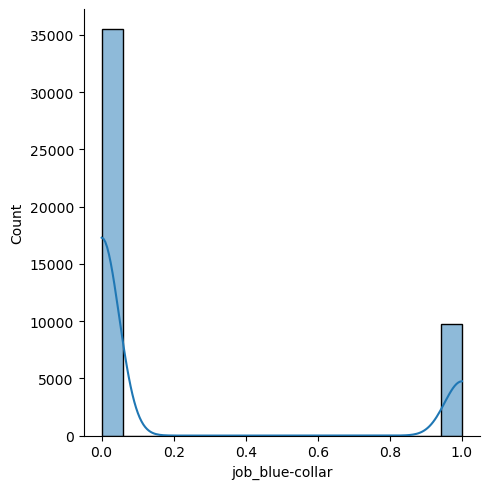

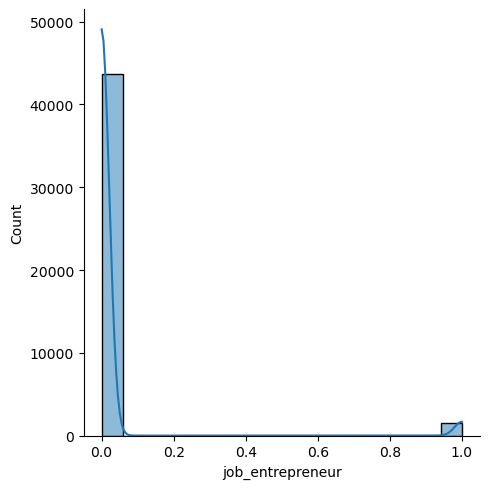

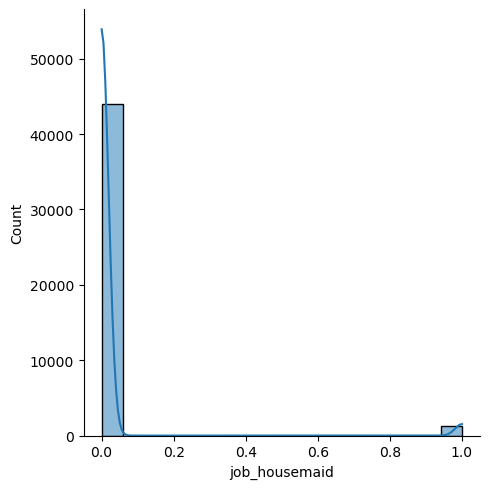

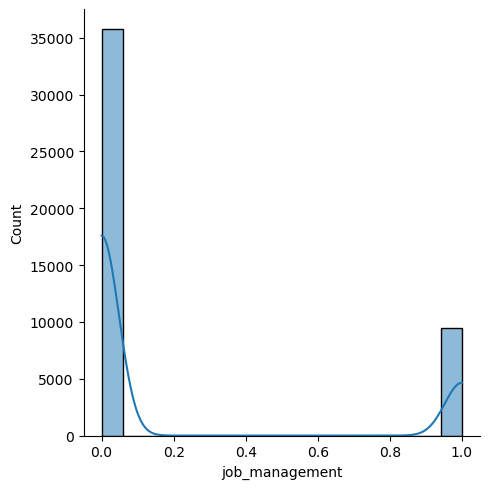

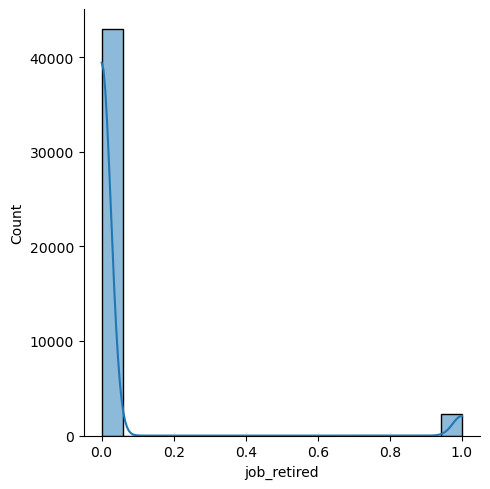

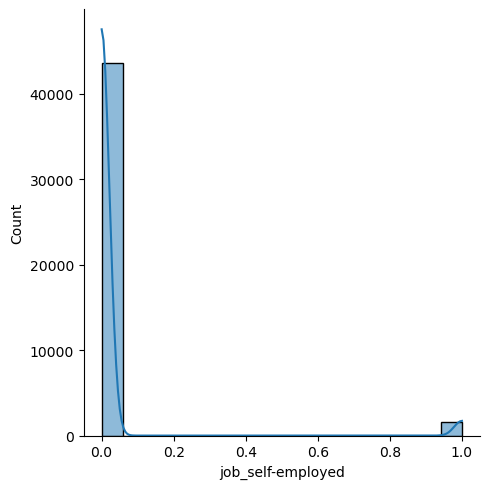

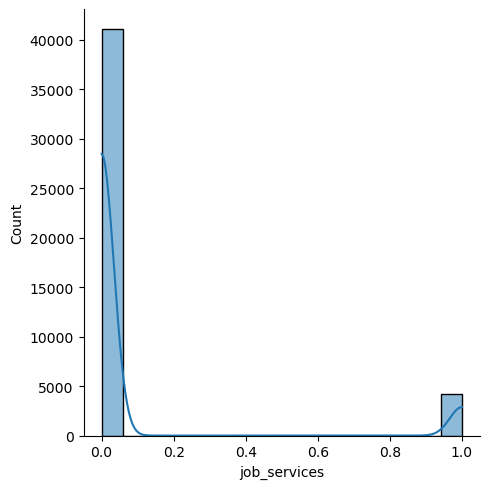

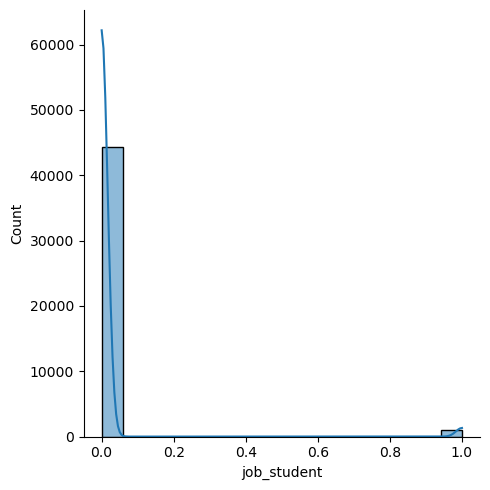

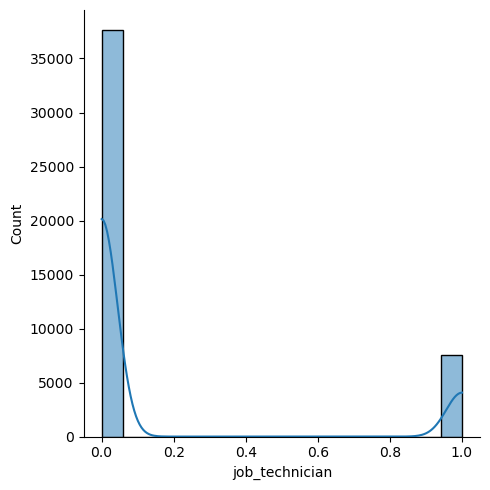

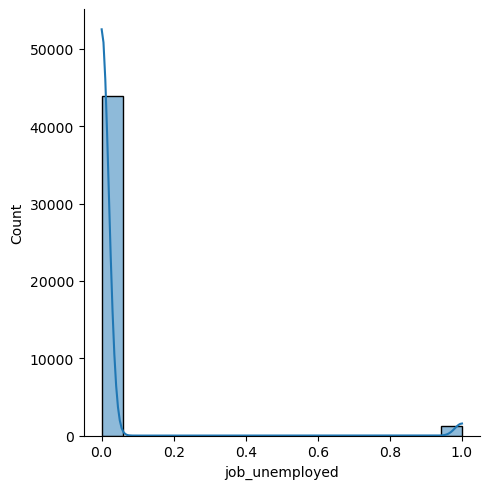

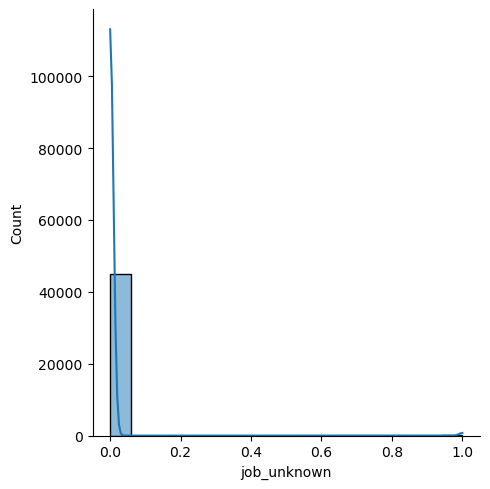

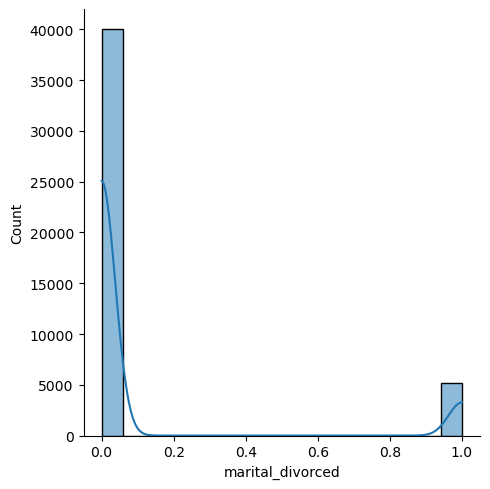

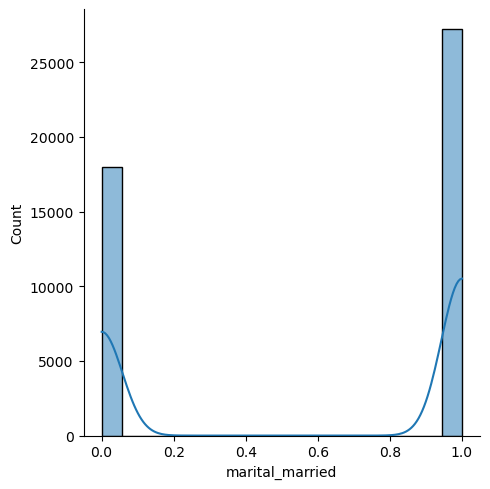

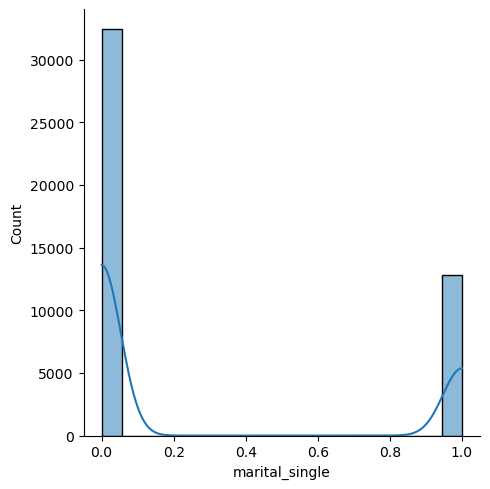

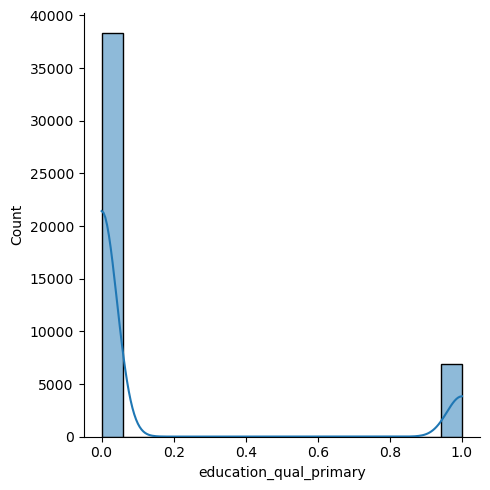

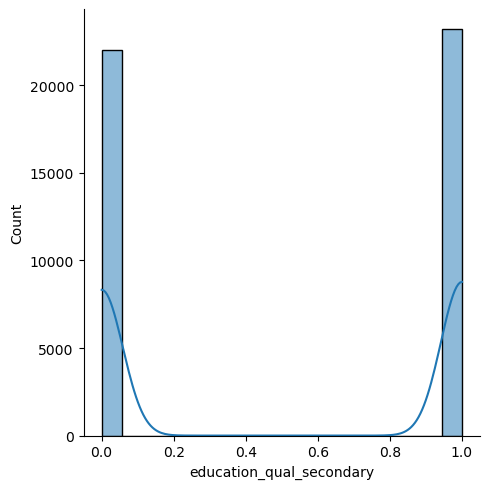

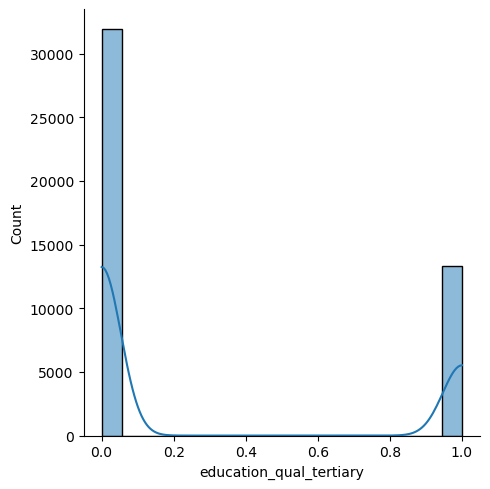

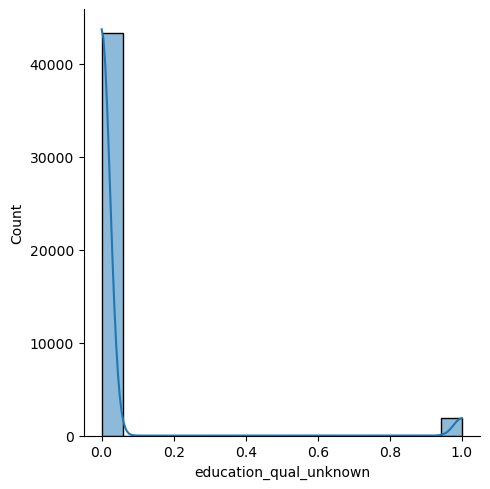

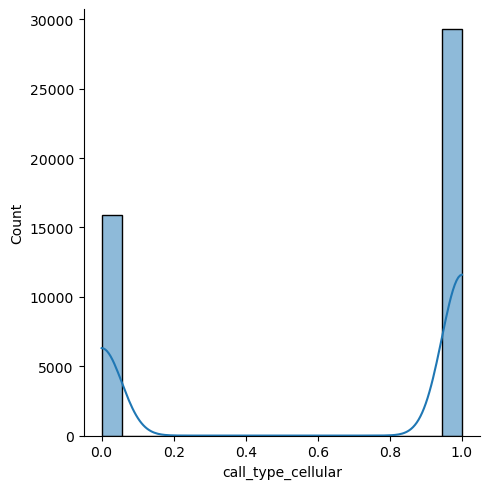

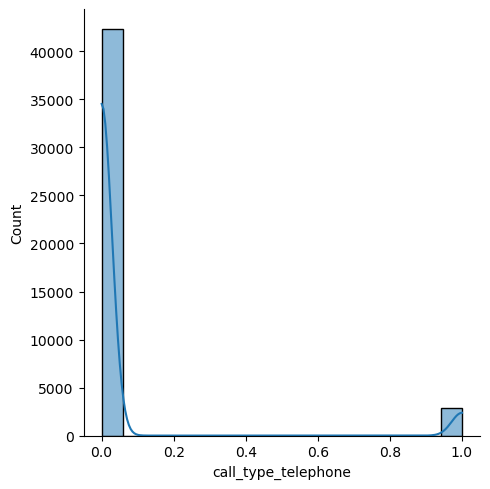

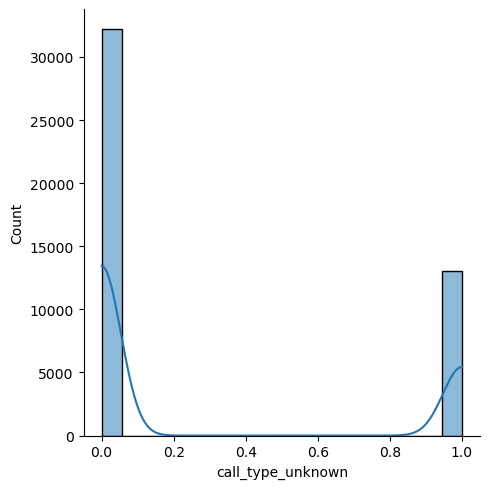

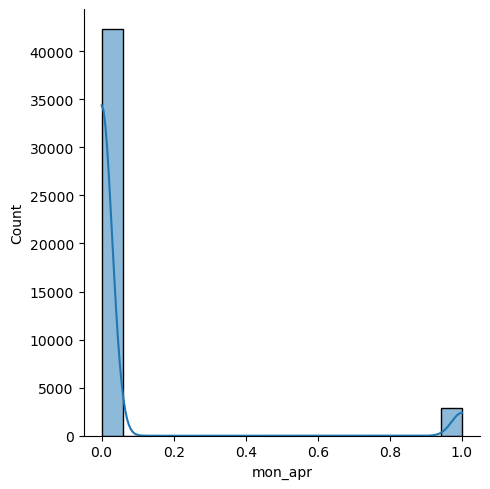

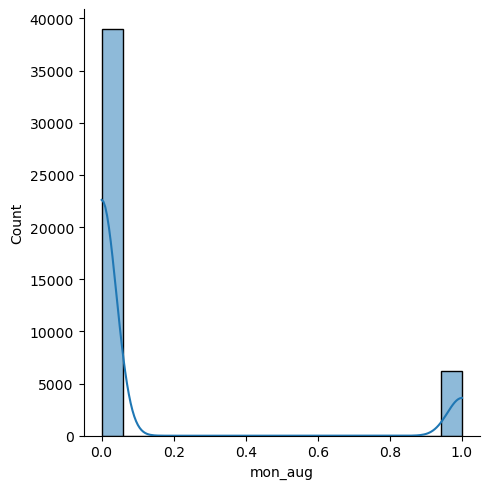

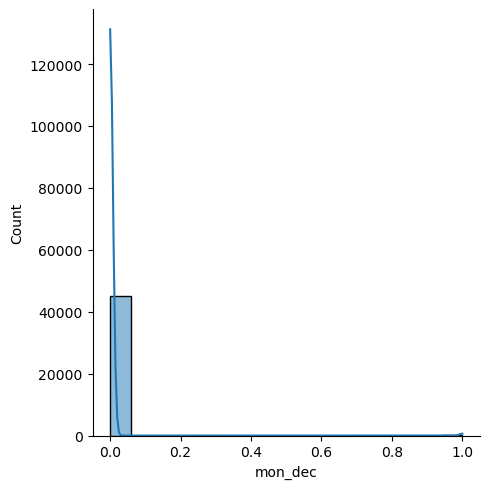

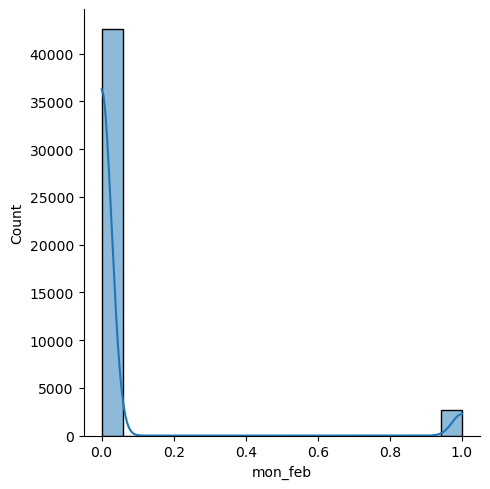

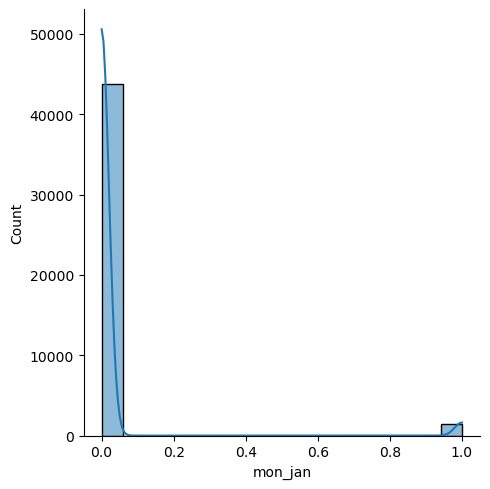

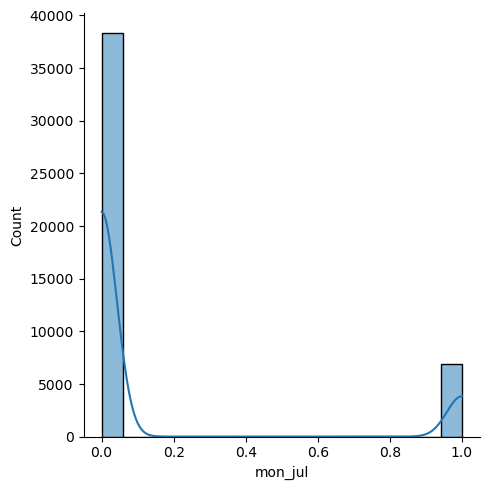

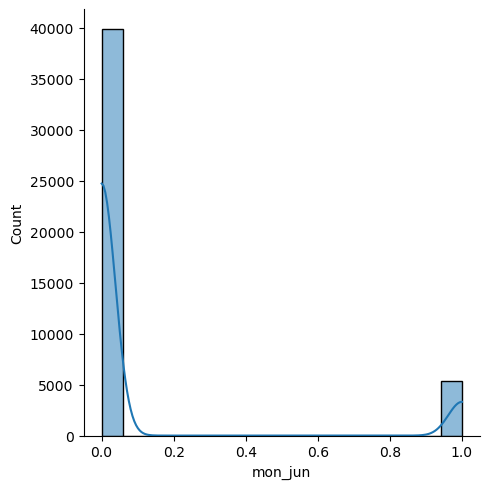

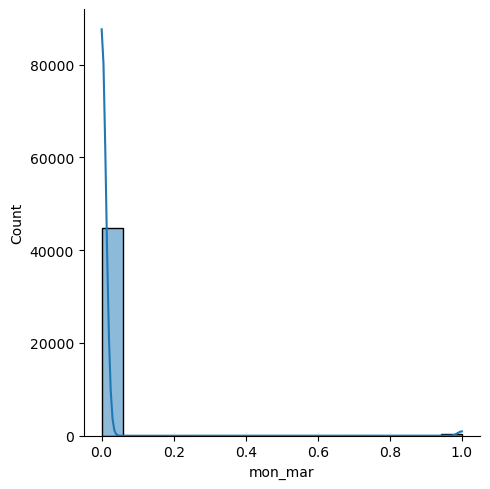

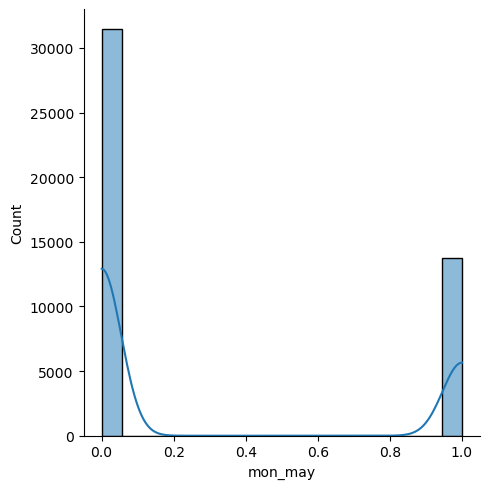

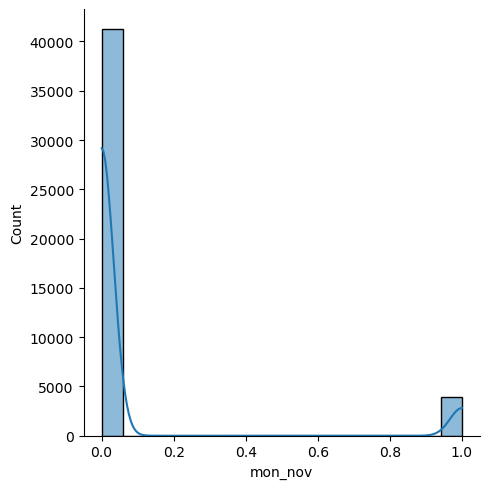

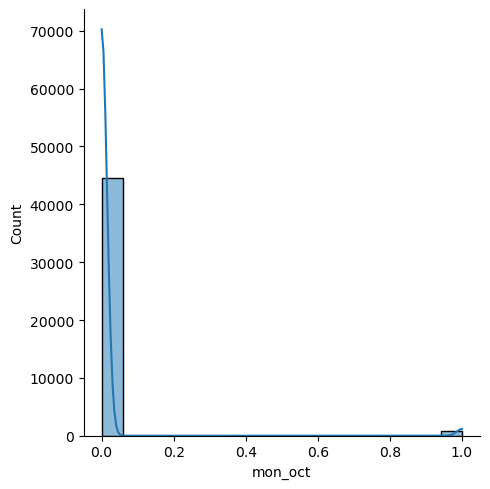

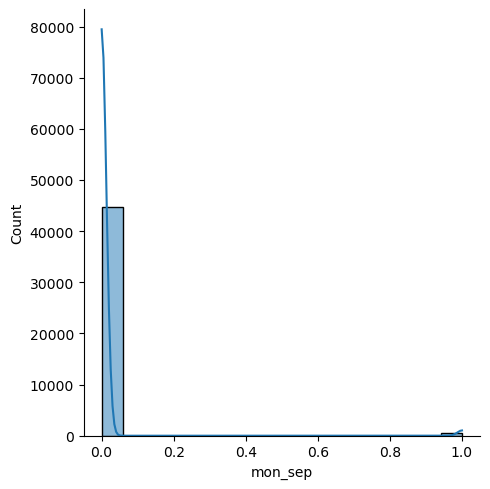

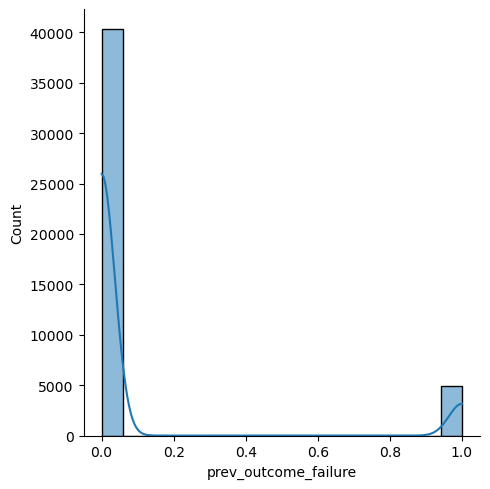

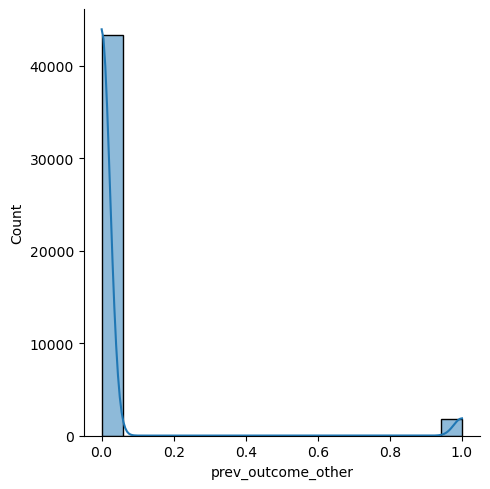

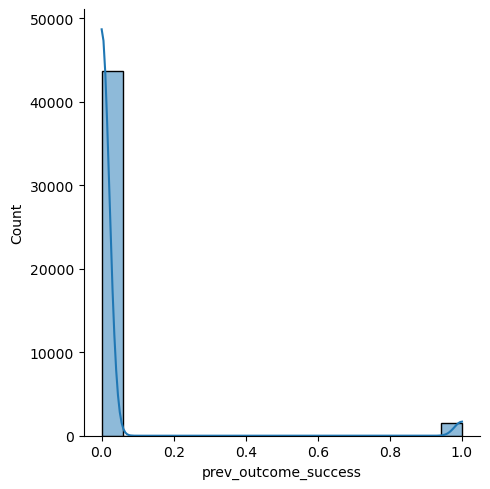

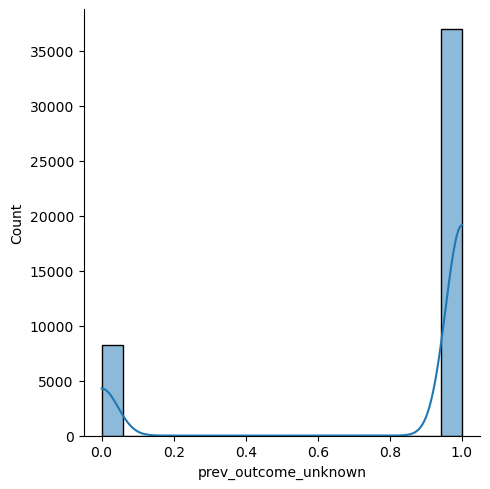

In [238]:
for col in final_data1.columns:
    sns.displot(final_data1[col],kde = True)

## Applying Logarithmic Transformation

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountere

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has 

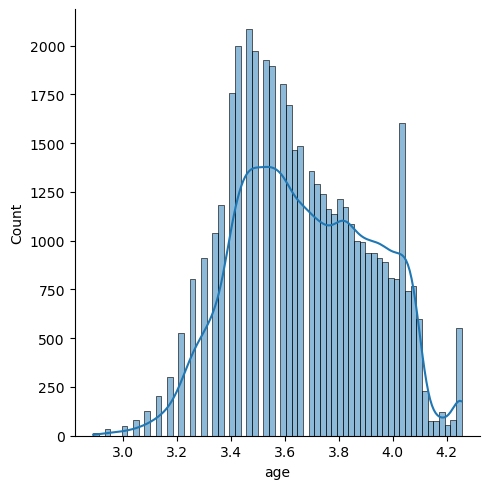

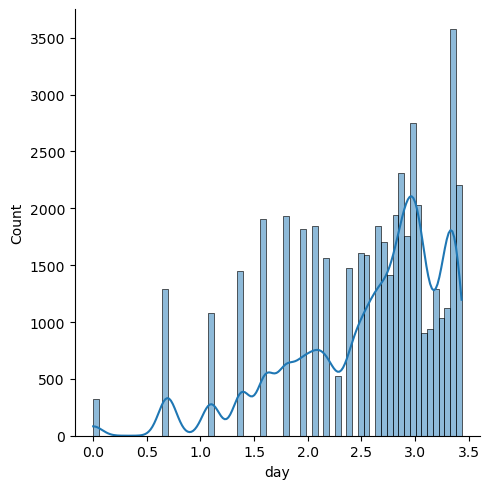

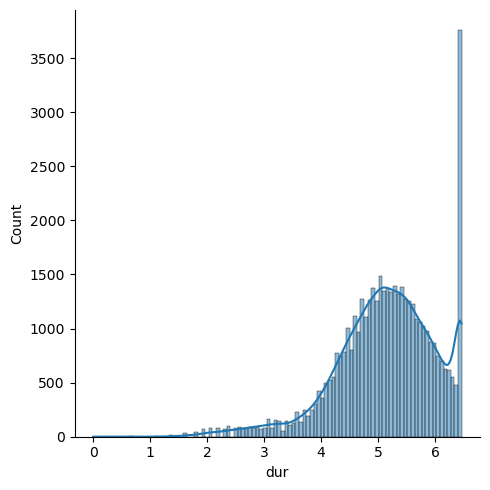

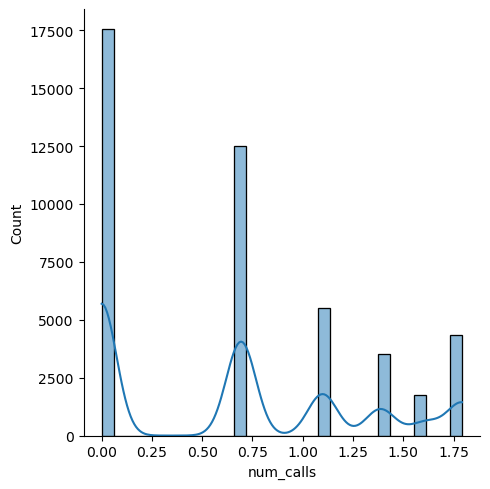

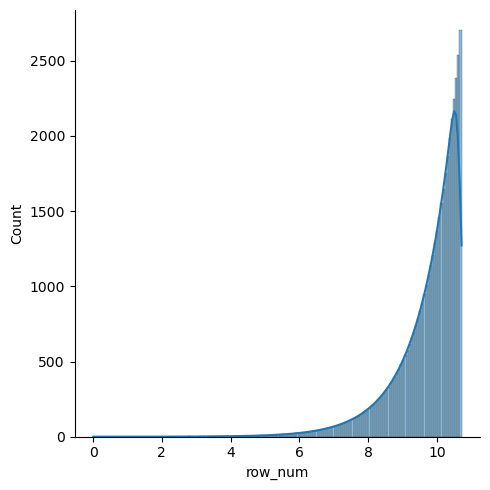

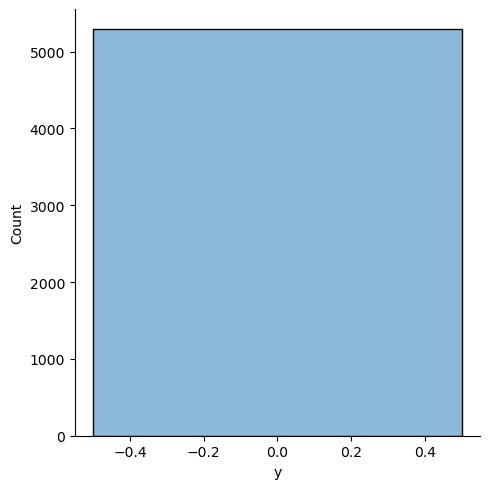

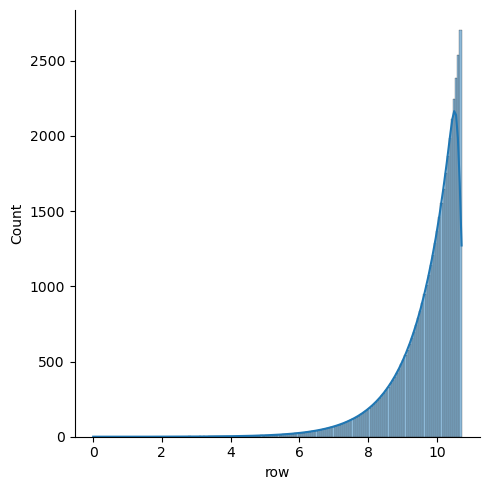

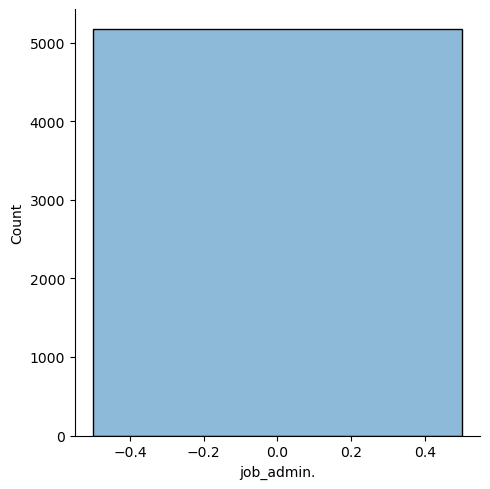

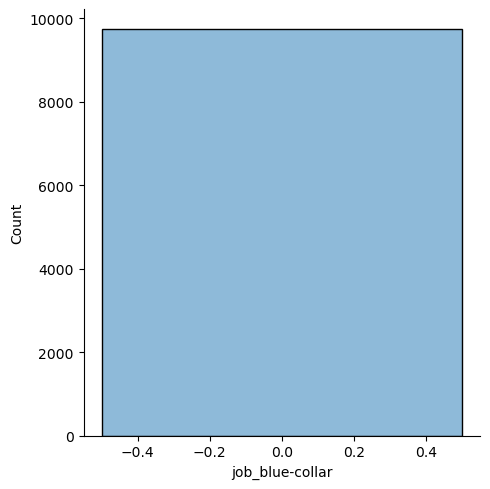

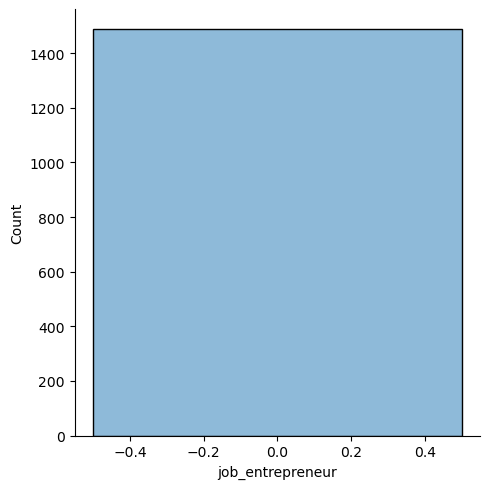

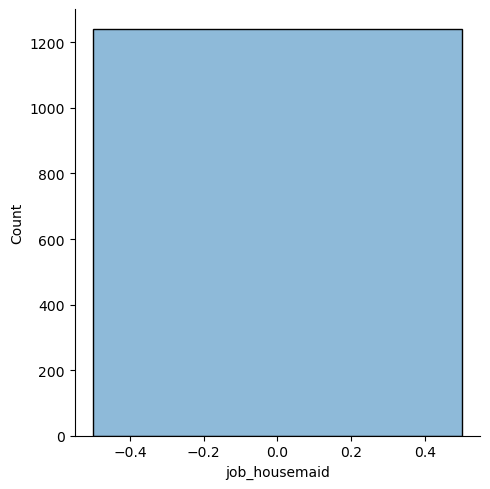

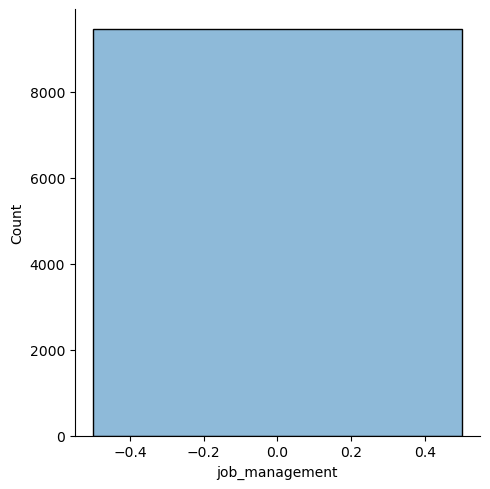

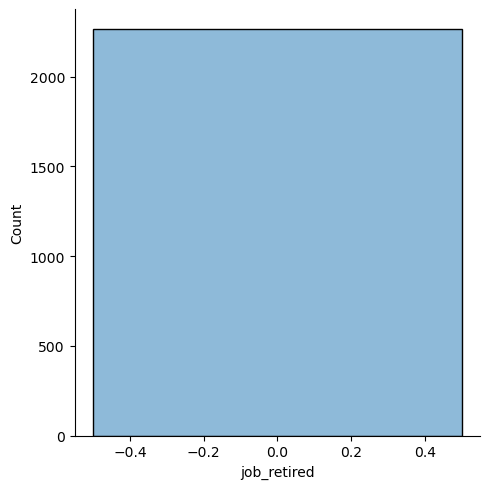

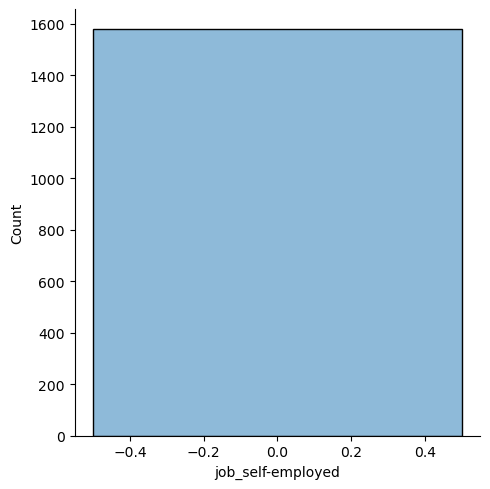

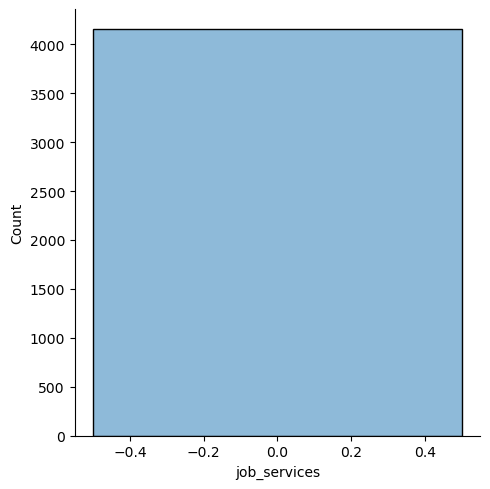

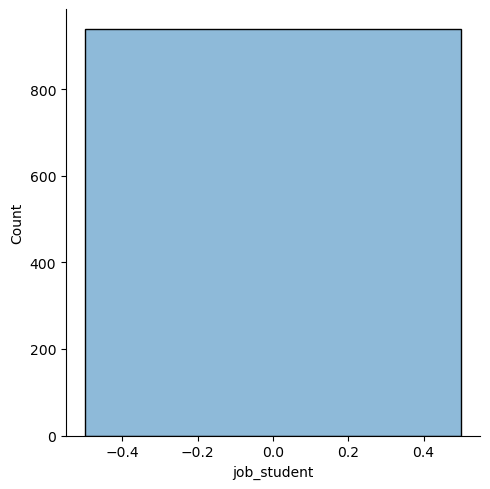

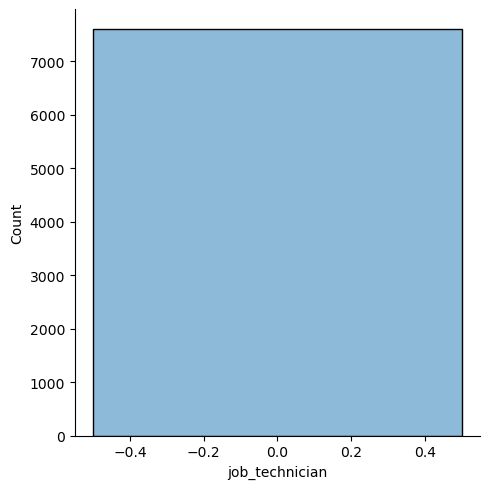

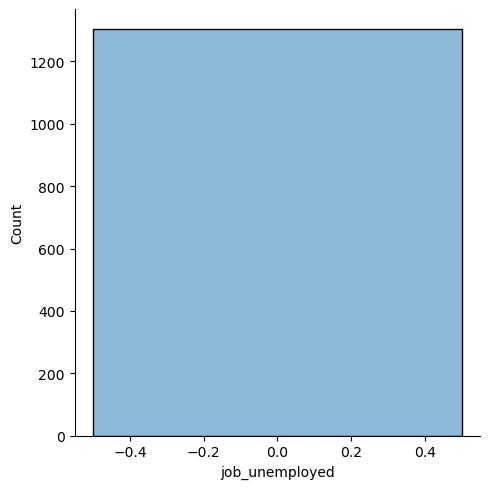

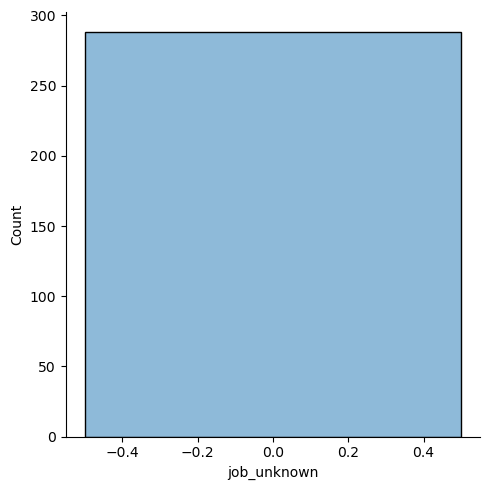

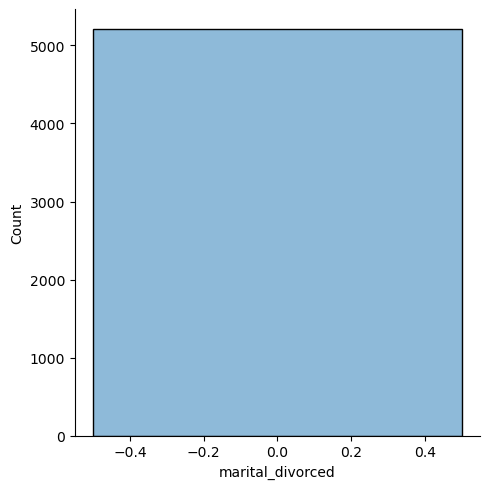

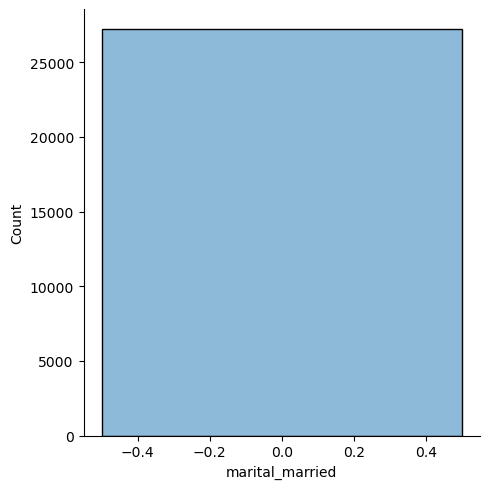

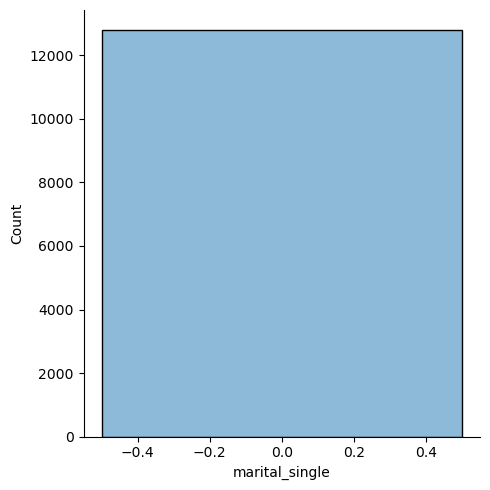

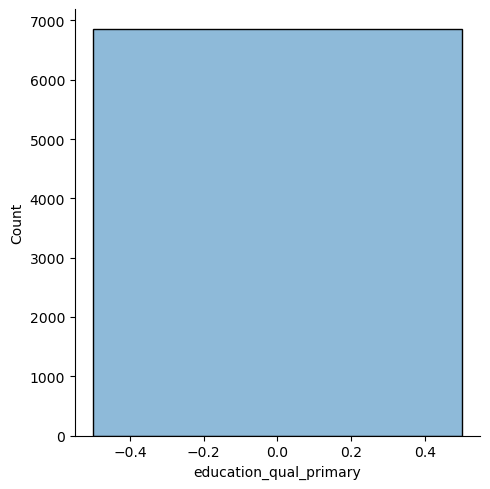

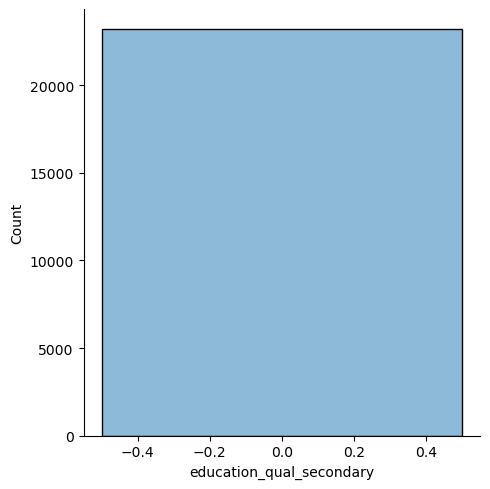

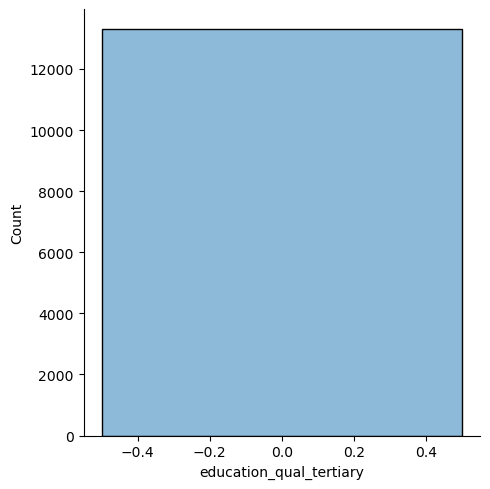

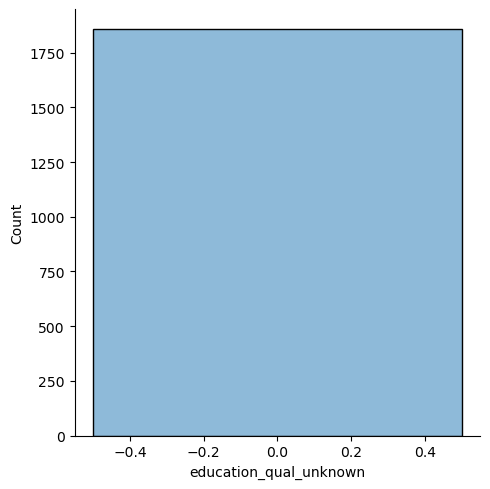

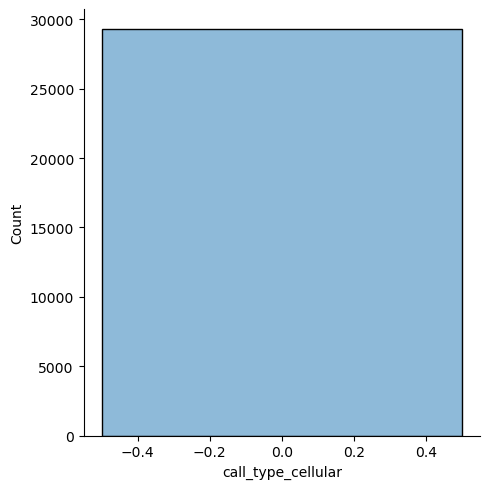

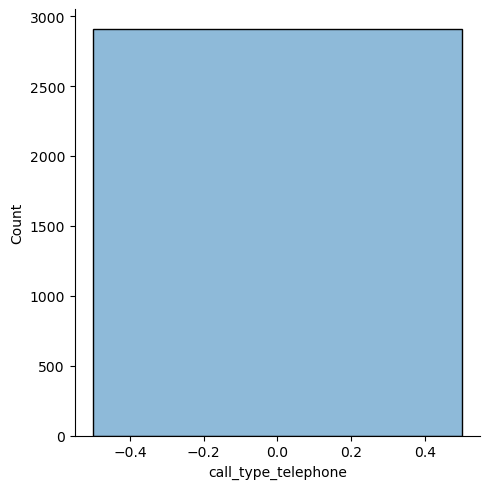

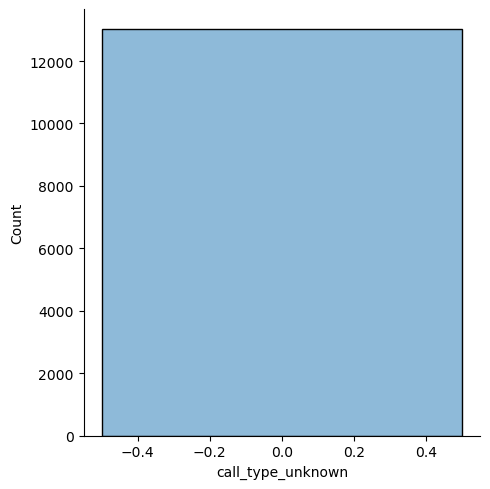

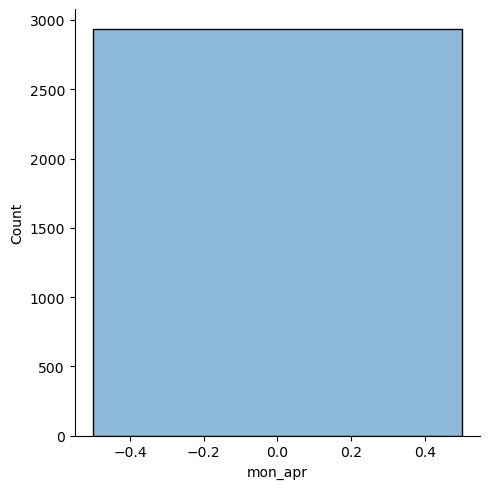

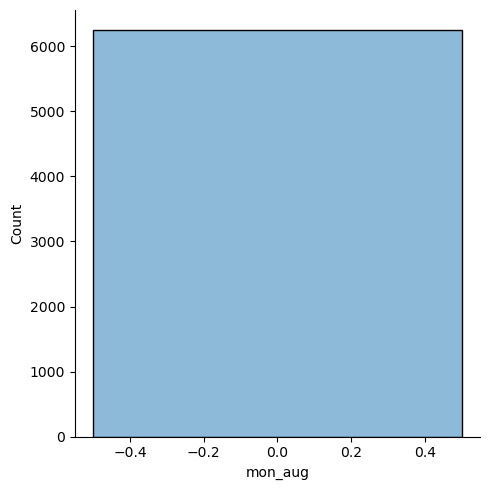

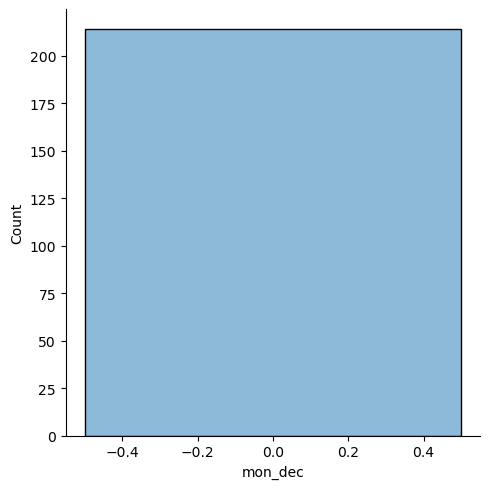

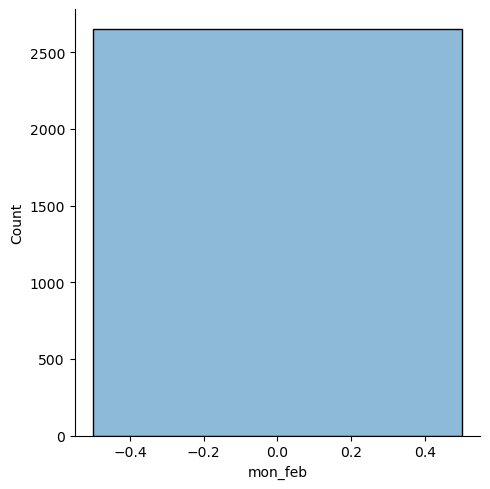

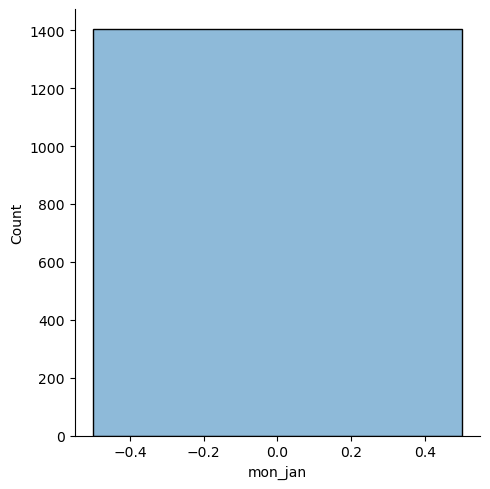

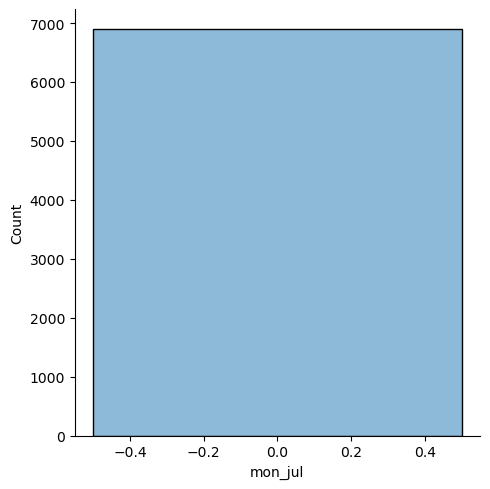

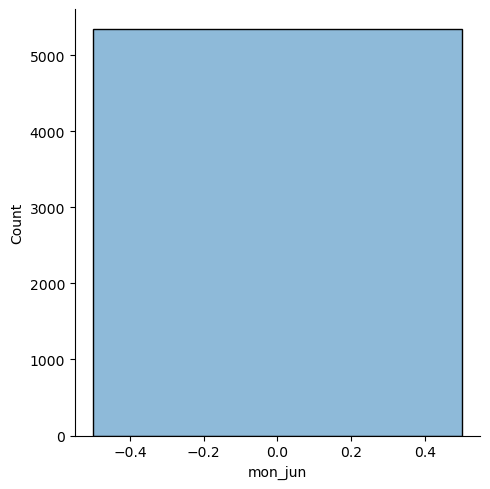

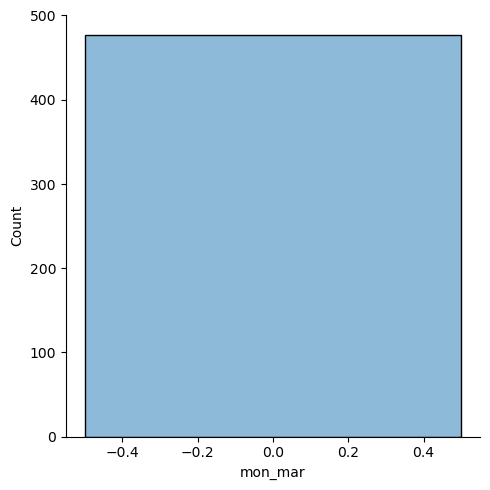

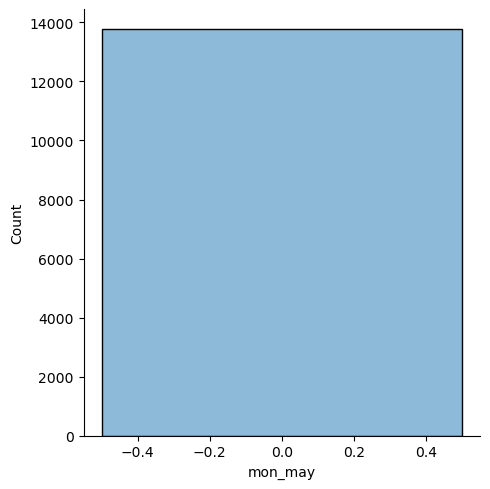

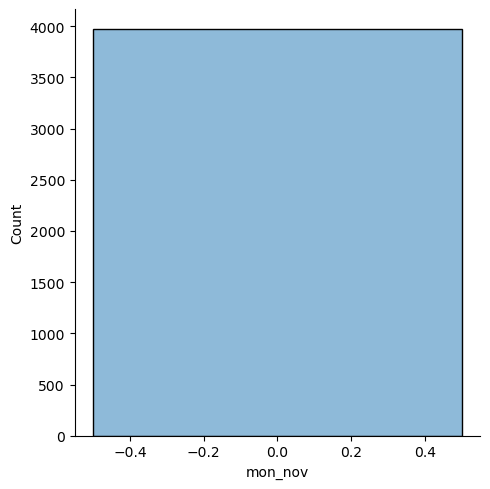

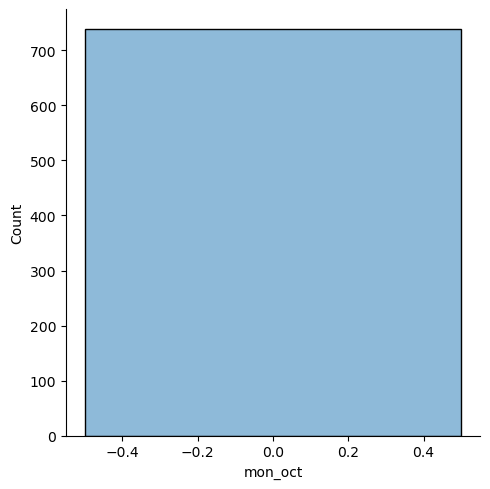

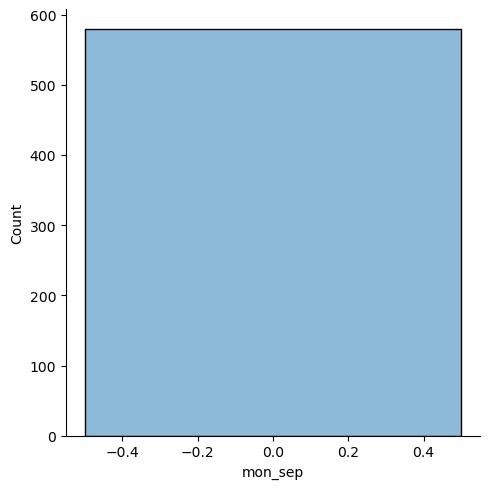

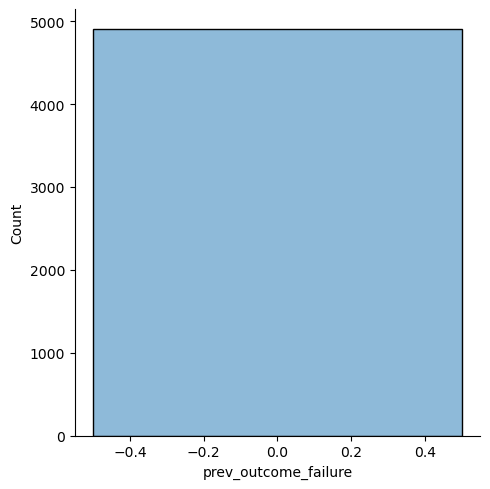

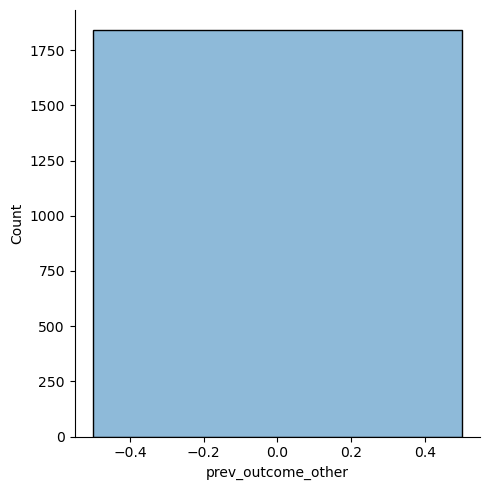

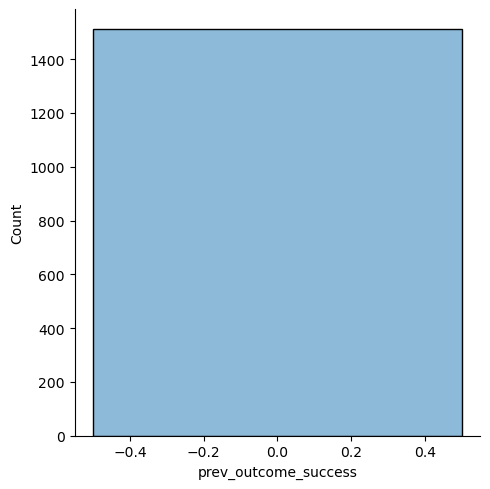

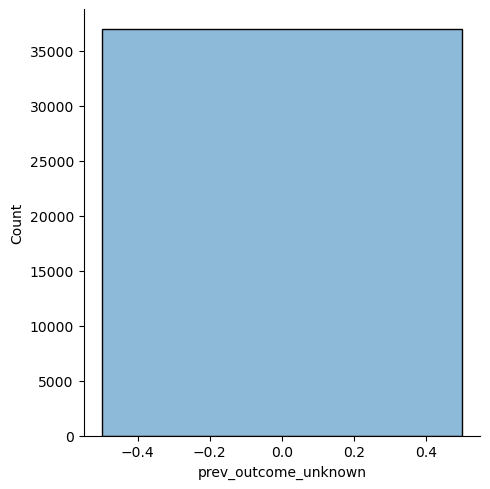

In [239]:
for col in final_data1.columns:
    sns.displot(np.log(final_data1[col]),kde = True)

## Feature Engineering

In [240]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [241]:
corr = final_data1.corrwith(final_data1.y).abs().sort_values(ascending = False)

In [242]:
corr

y                           1.000000
dur                         0.390642
prev_outcome_success        0.306783
row_num                     0.296269
row                         0.296269
prev_outcome_unknown        0.167032
call_type_unknown           0.150928
call_type_cellular          0.135870
mon_mar                     0.129452
mon_oct                     0.128526
mon_sep                     0.123181
mon_may                     0.102520
num_calls                   0.084067
job_retired                 0.079235
job_student                 0.076891
mon_dec                     0.075162
job_blue-collar             0.072077
education_qual_tertiary     0.066458
mon_apr                     0.065380
marital_single              0.063536
marital_married             0.060258
education_qual_primary      0.040395
mon_feb                     0.038406
education_qual_secondary    0.036392
mon_jul                     0.034382
job_management              0.032916
prev_outcome_other          0.031945
d

In [243]:
p = corr[np.abs(corr)>0.04].index.difference(['y'])
p

Index(['call_type_cellular', 'call_type_unknown', 'dur',
       'education_qual_primary', 'education_qual_tertiary', 'job_blue-collar',
       'job_retired', 'job_student', 'marital_married', 'marital_single',
       'mon_apr', 'mon_dec', 'mon_mar', 'mon_may', 'mon_oct', 'mon_sep',
       'num_calls', 'prev_outcome_success', 'prev_outcome_unknown', 'row',
       'row_num'],
      dtype='object')

In [244]:
final_data1 = final_data1.loc[ : : ,['y','call_type_cellular', 'call_type_unknown', 'dur','education_qual_primary', 'education_qual_tertiary', 'job_blue-collar','job_retired', 'job_student', 'marital_married', 'marital_single','mon_apr', 'mon_dec', 'mon_mar', 'mon_may', 'mon_oct', 'mon_sep','num_calls', 'prev_outcome_success', 'prev_outcome_unknown', 'row','row_num']]

In [245]:
final_data1.head()

,y,call_type_cellular,call_type_unknown,dur,education_qual_primary,education_qual_tertiary,job_blue-collar,job_retired,job_student,marital_married,marital_single,mon_apr,mon_dec,mon_mar,mon_may,mon_oct,mon_sep,num_calls,prev_outcome_success,prev_outcome_unknown,row,row_num
0,0,0,1,261,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1
1,0,0,1,151,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,2,2
2,0,0,1,76,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,3,3
3,0,0,1,92,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,4,4
4,0,0,1,198,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,5,5


In [246]:
final_data1.columns = [i.replace('-','_')for i in final_data1.columns]

In [247]:
final_data1.columns

Index(['y', 'call_type_cellular', 'call_type_unknown', 'dur',
       'education_qual_primary', 'education_qual_tertiary', 'job_blue_collar',
       'job_retired', 'job_student', 'marital_married', 'marital_single',
       'mon_apr', 'mon_dec', 'mon_mar', 'mon_may', 'mon_oct', 'mon_sep',
       'num_calls', 'prev_outcome_success', 'prev_outcome_unknown', 'row',
       'row_num'],
      dtype='object')

In [248]:
final_data1.shape

(45205, 22)

## Sampling

**The imbalanced class distribution in the target variable, with approximately 89% for the majority class and 11% for the minority class, it is necessary to perform resampling to address the imbalance.**

In [249]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.combine import SMOTEENN

In [250]:
X_Sample = final_data1.drop(['y'],axis=1)
Y_Sample = final_data1['y']

In [251]:
smote = SMOTEENN(sampling_strategy="all")
X,Y = smote.fit_resample(X_Sample,Y_Sample)

In [252]:
print(len(X),len(Y))

65993 65993


## Splitting the final dataset into Training and Testing dataset

In [256]:
X = final_data1.drop(['y'],axis=1)
Y = final_data1['y']

In [257]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [258]:
X_train.shape, Y_test.shape

((31643, 21), (13562,))

In [259]:
Y_train.shape, Y_test.shape  

((31643,), (13562,))

In [260]:
X_train.head()

,call_type_cellular,call_type_unknown,dur,education_qual_primary,education_qual_tertiary,job_blue_collar,job_retired,job_student,marital_married,marital_single,mon_apr,mon_dec,mon_mar,mon_may,mon_oct,mon_sep,num_calls,prev_outcome_success,prev_outcome_unknown,row,row_num
24388,0,0,155,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,24395,24395
28952,1,0,643,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,28959,28959
986,0,1,216,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,1,987,987
19779,1,0,133,0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,1,19784,19784
4027,0,1,512,0,1,0,0,0,0,0,0,0,0,1,0,0,6,0,1,4028,4028


In [261]:
X_test.head()

,call_type_cellular,call_type_unknown,dur,education_qual_primary,education_qual_tertiary,job_blue_collar,job_retired,job_student,marital_married,marital_single,mon_apr,mon_dec,mon_mar,mon_may,mon_oct,mon_sep,num_calls,prev_outcome_success,prev_outcome_unknown,row,row_num
31103,1,0,323,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,31110,31110
19815,1,0,94,0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,1,19820,19820
29489,1,0,280,0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,1,29496,29496
16083,1,0,183,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,16088,16088
14235,0,0,236,1,0,1,0,0,1,0,0,0,0,0,0,0,2,0,1,14240,14240


In [262]:
formula = 'y_yes~' + '+'.join(X_train.columns.difference(['y']))

In [263]:
formula

'y_yes~call_type_cellular+call_type_unknown+dur+education_qual_primary+education_qual_tertiary+job_blue_collar+job_retired+job_student+marital_married+marital_single+mon_apr+mon_dec+mon_mar+mon_may+mon_oct+mon_sep+num_calls+prev_outcome_success+prev_outcome_unknown+row+row_num'

## Model Building

### Logistic Regression

In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [271]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score

In [270]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, Y_train)
y_pred_lr = Logistic_Regression.predict(X_test)

lr_AUROC = roc_auc_score(Y_test, y_pred_lr)*100
lr_Acu = accuracy_score(Y_test, y_pred_lr)*100
lr_f1 = f1_score(Y_test, y_pred_lr)



print( "AUROC OF Sampled Logistic Regression : ", roc_auc_score(Y_test, Logistic_Regression.predict_proba(X_test)[:,1])*100)
print("F1 SCORE OF Logistic Regression : ", lr_f1 )
print("Accuracy OF Logistic Regression : ", lr_Acu)
print("AUROC OF Logistic Regression : ", lr_AUROC)

AUROC OF Sampled Logistic Regression :  75.1377699549971
F1 SCORE OF Logistic Regression :  0.27447392497712714
Accuracy OF Logistic Regression :  88.30555965196874
AUROC OF Logistic Regression :  58.20336160321401


**The accuracy of the Logistic Regression model is 88.31%. This indicates that 88.31% of the predictions made by the model on the test set were correct.**